# <center>EPIB 613 INTRODUCTION TO STATISTICAL SOFTWARE</center>

<center> McGill EBOH </center>

<center> Fall 2020 </center>

<center> Yi Lian </center>

# Lecture 11
- Linear regression
    - Model fitting and interpretation
    - Prediction, confidence interval and prediction intervals
    - Tests and diagnostics
- Bootstrap
    - Motivation
    - Rationale

## 11.1 Model fitting and interpretation
##### `ToothGrowth` data
- The response is the length of odontoblasts (cells responsible for tooth growth) in 60 guinea pigs. Each animal received one of three dose levels of vitamin C (0.5, 1, and 2 mg/day) by one of two delivery methods, orange juice (OJ) or vitamin C (VC).

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5


,len,supp,dose
,<dbl>,<fct>,<dbl>
55,24.8,OJ,2
56,30.9,OJ,2
57,26.4,OJ,2
58,27.3,OJ,2
59,29.4,OJ,2
60,23.0,OJ,2


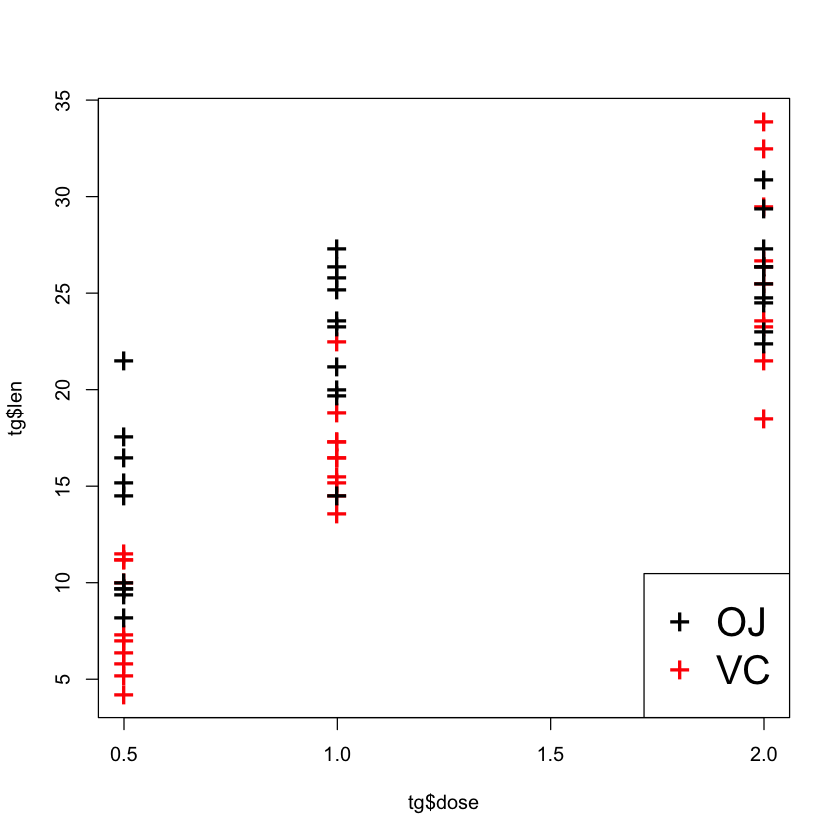

In [1]:
# ?ToothGrowth
tg <- ToothGrowth
head(tg); tail(tg)
plot(tg$dose, tg$len, col = tg$supp, pch = "+", cex = 2)
legend("bottomright", legend = c("OJ", "VC"), pch = "+", col = 1:2, cex = 2)

### 11.1.1 Investigate the effect of dose on length.

In [2]:
fit.dose <- lm(len ~ dose, data = tg)
fit.dose


Call:
lm(formula = len ~ dose, data = tg)

Coefficients:
(Intercept)         dose  
      7.423        9.764  


In [3]:
summary(fit.dose)


Call:
lm(formula = len ~ dose, data = tg)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4496 -2.7406 -0.7452  2.8344 10.1139 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.4225     1.2601    5.89 2.06e-07 ***
dose          9.7636     0.9525   10.25 1.23e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.601 on 58 degrees of freedom
Multiple R-squared:  0.6443,	Adjusted R-squared:  0.6382 
F-statistic: 105.1 on 1 and 58 DF,  p-value: 1.233e-14


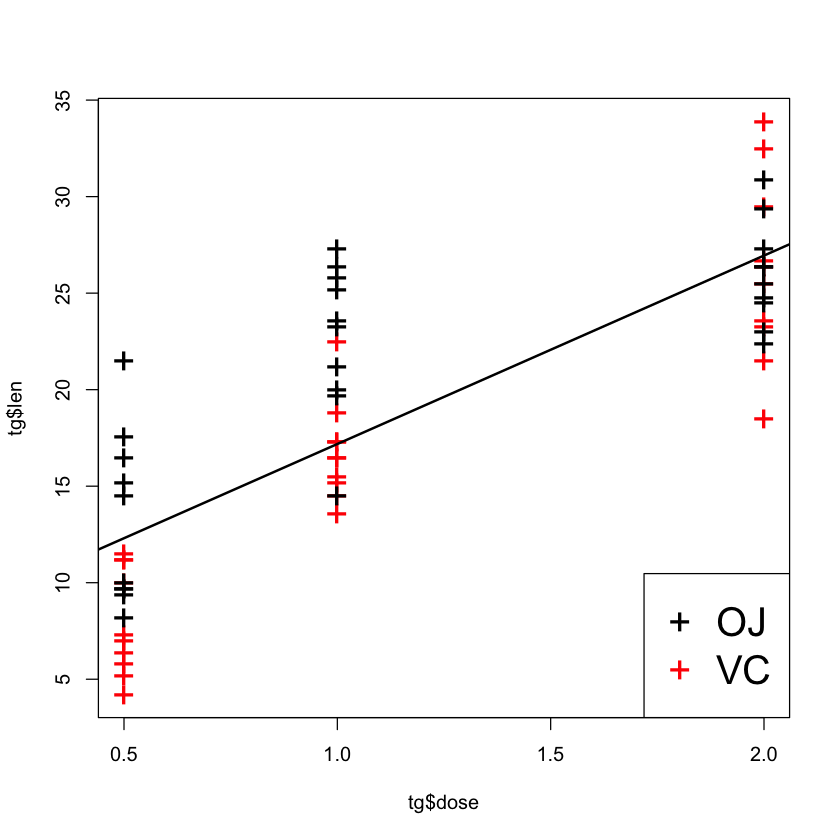

In [4]:
plot(tg$dose, tg$len, col = tg$supp, pch = "+", cex = 2)
legend("bottomright", legend = c("OJ", "VC"), pch = "+", col = 1:2, cex = 2)

abline(fit.dose, lwd = 2)

##### Interpretation?

### 11.1.2 Investigate the effect of  delivery methods on length.

In [5]:
str(tg$supp)

 Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...


In [6]:
tg$supp <- factor(tg$supp, levels = c("VC", "OJ"))

In [7]:
fit.supp2 <- lm(len ~ supp, data = tg)
summary(fit.supp2)


Call:
lm(formula = len ~ supp, data = tg)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7633  -5.7633   0.4367   5.5867  16.9367 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.963      1.366  12.418   <2e-16 ***
suppOJ         3.700      1.932   1.915   0.0604 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.482 on 58 degrees of freedom
Multiple R-squared:  0.05948,	Adjusted R-squared:  0.04327 
F-statistic: 3.668 on 1 and 58 DF,  p-value: 0.06039


In [8]:
# change back
tg$supp <- factor(tg$supp, levels = c("OJ", "VC"))

In [9]:
means <- aggregate(len~supp, data = tg, FUN = mean)
diff(means$len)

[1] -3.7

### 11.1.3 Calculate the mean of length.
- Intercept only model.

In [10]:
fit.int <- lm(len~1, data = tg)
summary(fit.int)


Call:
lm(formula = len ~ 1, data = tg)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6133  -5.7383   0.4367   6.4617  15.0867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.8133     0.9875   19.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.649 on 59 degrees of freedom


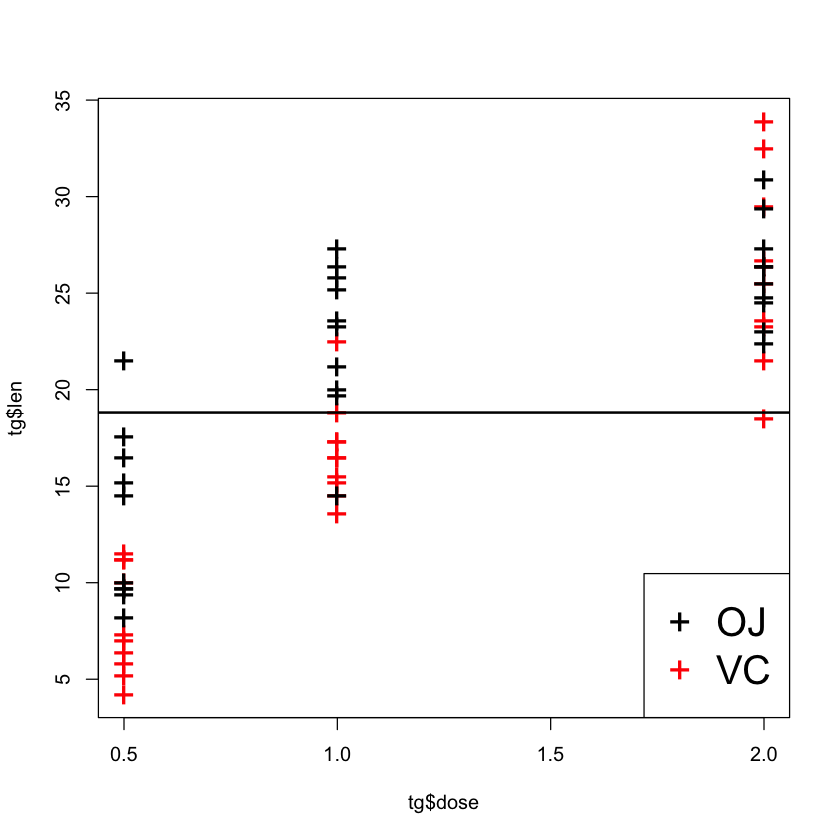

In [11]:
plot(tg$dose, tg$len, col = tg$supp, pch = "+", cex = 2)
legend("bottomright", legend = c("OJ", "VC"), pch = "+", col = 1:2, cex = 2)

abline(fit.int, lwd = 2)

### 11.1.4 Fit a model without the intercept

In [12]:
fit.slope <- lm(len~dose - 1, data = tg)
fit.slope


Call:
lm(formula = len ~ dose - 1, data = tg)

Coefficients:
 dose  
14.71  


In [13]:
summary(fit.slope)


Call:
lm(formula = len ~ dose - 1, data = tg)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.924  -2.298   1.632   4.604  14.144 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
dose  14.7119     0.5628   26.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.767 on 59 degrees of freedom
Multiple R-squared:  0.9205,	Adjusted R-squared:  0.9192 
F-statistic: 683.2 on 1 and 59 DF,  p-value: < 2.2e-16


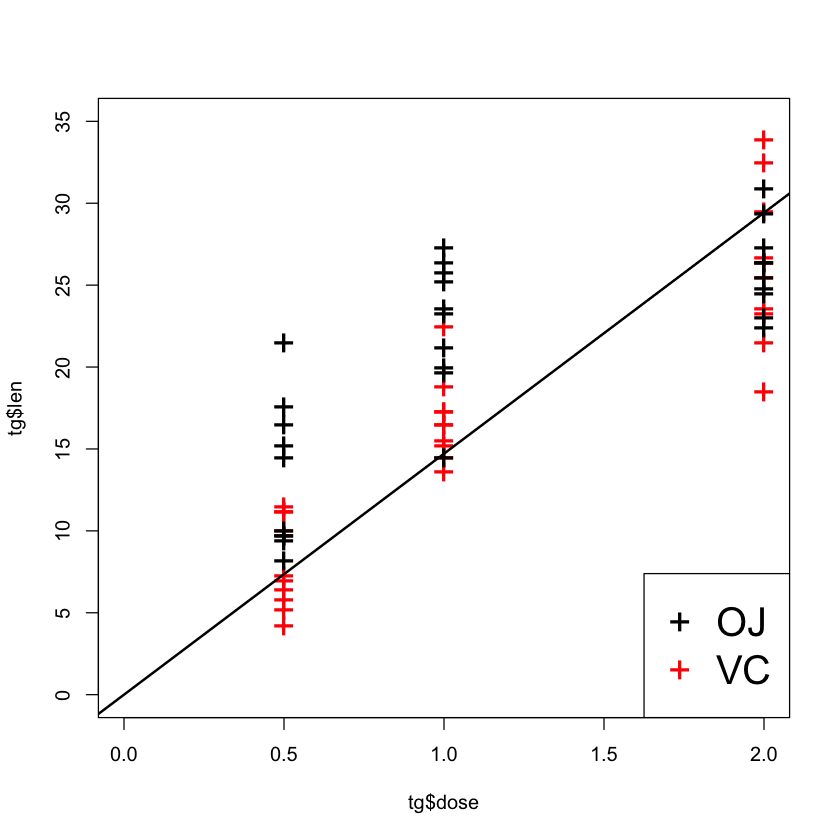

In [14]:
plot(tg$dose, tg$len, col = tg$supp, pch = "+",
     cex = 2, xlim = c(0,2), ylim = c(0,35))
legend("bottomright", legend = c("OJ", "VC"), pch = "+", col = 1:2, cex = 2)

abline(fit.slope, lwd = 2)

### 11.1.5 Investigate dose and delivery method at the same time

In [15]:
fit.both <- lm(len~supp+dose, data = tg)
summary(fit.both)

# or fit.both <- lm(len~., data = tg)
# ~. means fit on all other variables in the data frame.


Call:
lm(formula = len ~ supp + dose, data = tg)

Residuals:
   Min     1Q Median     3Q    Max 
-6.600 -3.700  0.373  2.116  8.800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.2725     1.2824   7.231 1.31e-09 ***
suppVC       -3.7000     1.0936  -3.383   0.0013 ** 
dose          9.7636     0.8768  11.135 6.31e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.236 on 57 degrees of freedom
Multiple R-squared:  0.7038,	Adjusted R-squared:  0.6934 
F-statistic: 67.72 on 2 and 57 DF,  p-value: 8.716e-16


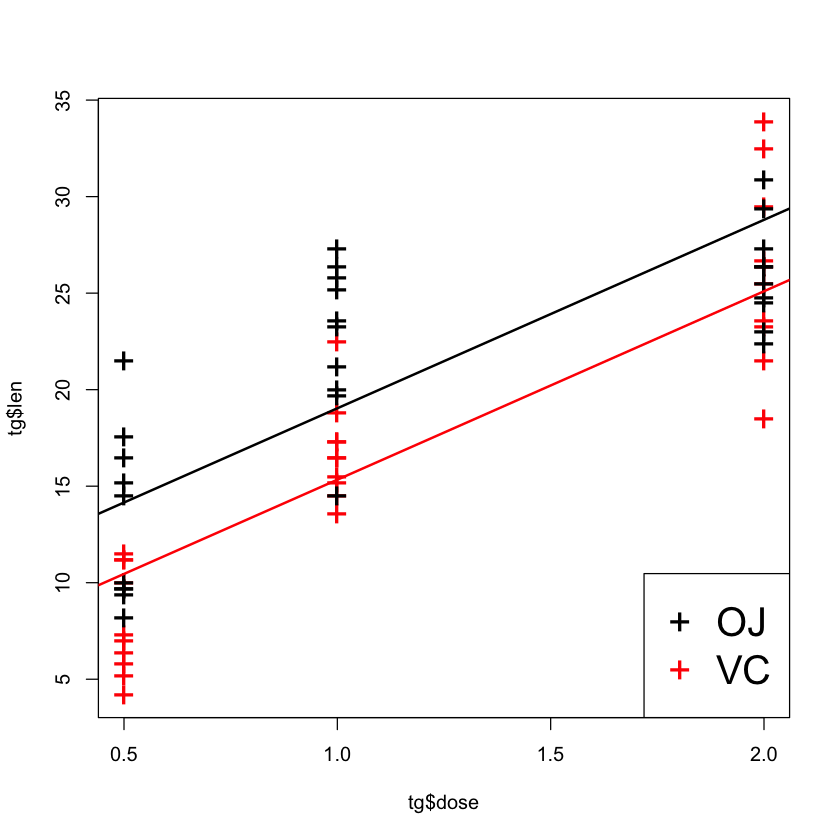

In [16]:
plot(tg$dose, tg$len, col = tg$supp, pch = "+", cex = 2)
legend("bottomright", legend = c("OJ", "VC"), pch = "+", col = 1:2, cex = 2)

abline(a = fit.both$coefficients["(Intercept)"], b = fit.both$coefficients["dose"], lwd = 2)
abline(a = fit.both$coefficients["(Intercept)"] + fit.both$coefficients["suppVC"],
       b = fit.both$coefficients["dose"], col = "red", lwd = 2)

### 11.1.6 Investigate the interaction between dose and delivery method

In [17]:
fit.interaction <- lm(len~supp*dose, data = tg)
summary(fit.interaction)


Call:
lm(formula = len ~ supp * dose, data = tg)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2264 -2.8462  0.0504  2.2893  7.9386 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.550      1.581   7.304 1.09e-09 ***
suppVC        -8.255      2.236  -3.691 0.000507 ***
dose           7.811      1.195   6.534 2.03e-08 ***
suppVC:dose    3.904      1.691   2.309 0.024631 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.083 on 56 degrees of freedom
Multiple R-squared:  0.7296,	Adjusted R-squared:  0.7151 
F-statistic: 50.36 on 3 and 56 DF,  p-value: 6.521e-16


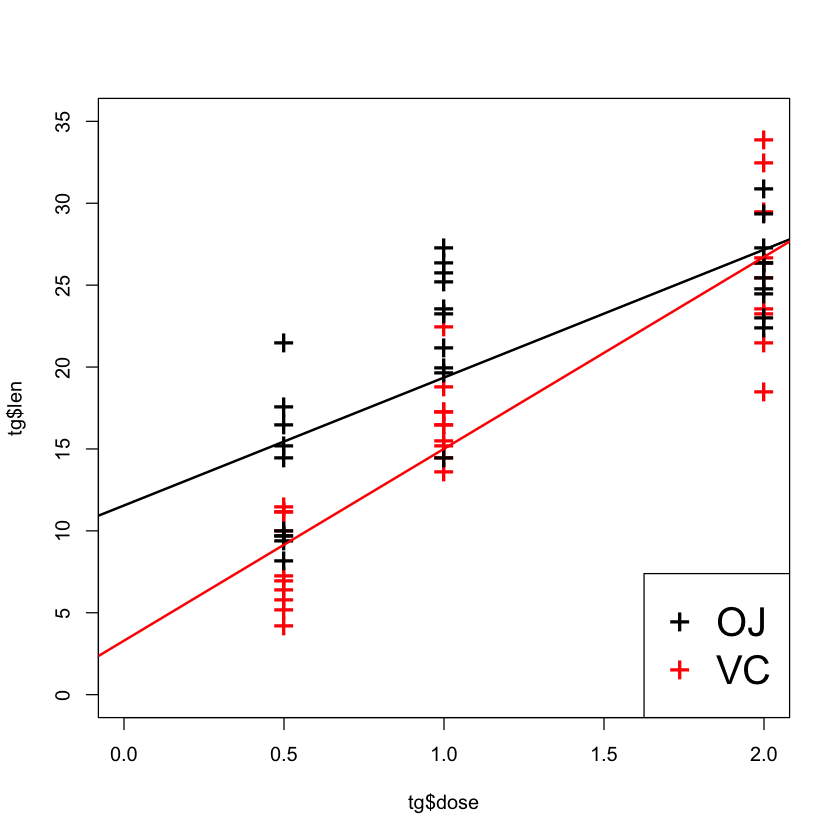

In [18]:
plot(tg$dose, tg$len, col = tg$supp, pch = "+", cex = 2,
     xlim = c(0,2), ylim = c(0,35))
legend("bottomright", legend = c("OJ", "VC"), pch = "+", col = 1:2, cex = 2)

abline(a = fit.interaction$coefficients["(Intercept)"],
       b = fit.interaction$coefficients["dose"], lwd = 2)
abline(a = fit.interaction$coefficients["(Intercept)"] + fit.interaction$coefficients["suppVC"],
       b = fit.interaction$coefficients["dose"] + fit.interaction$coefficients["suppVC:dose"],
       col = "red", lwd = 2)

### 11.1.7 Investigate the interaction between dose and delivery method, common intercept

In [19]:
fit.interaction.only <- lm(len~supp:dose + dose, data = tg)
summary(fit.interaction.only)


Call:
lm(formula = len ~ supp:dose + dose, data = tg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7045 -3.1125 -0.7045  2.4341  9.3144 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.4225     1.2359   6.006 1.41e-07 ***
dose         10.5631     1.0328  10.227 1.64e-14 ***
suppVC:dose  -1.5990     0.8808  -1.815   0.0747 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.513 on 57 degrees of freedom
Multiple R-squared:  0.6638,	Adjusted R-squared:  0.652 
F-statistic: 56.26 on 2 and 57 DF,  p-value: 3.233e-14


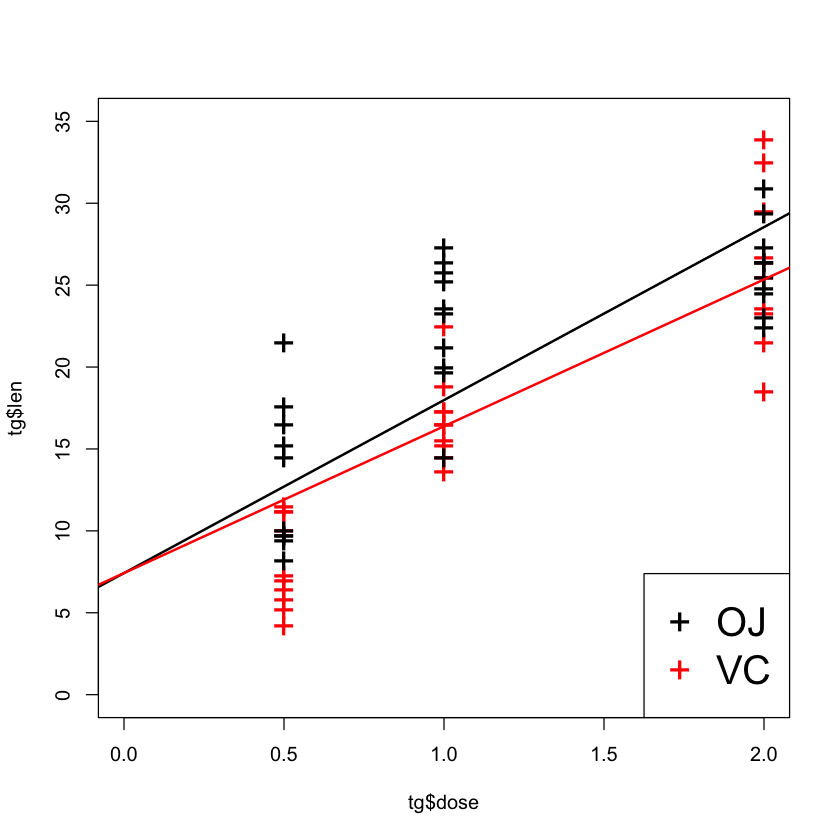

In [20]:
plot(tg$dose, tg$len, col = tg$supp, pch = "+", cex = 2,
     xlim = c(0,2), ylim = c(0,35))
legend("bottomright", legend = c("OJ", "VC"), pch = "+", col = 1:2, cex = 2)

abline(a = fit.interaction.only$coefficients["(Intercept)"],
       b = fit.interaction.only$coefficients["dose"], lwd = 2)
abline(a = fit.interaction.only$coefficients["(Intercept)"],
       b = fit.interaction.only$coefficients["dose"] + fit.interaction.only$coefficients["suppVC:dose"],
       col = "red", lwd = 2)

## 11.2 Prediction, confidence interval and prediction intervals
### 11.2.1 Prediction with new data

In [21]:
new.data <- data.frame(supp = c("OJ", "VC"), dose = rep(1.5, 2))
new.data
print(predict(object = fit.both, newdata = new.data))

supp,dose
<fct>,<dbl>
OJ,1.5
VC,1.5


       1        2 
23.91786 20.21786 


### 11.2.2 Confidence interval and prediction interval for the predicted outcome

In [22]:
predict(fit.both, newdata = new.data, interval = "confidence")

,fit,lwr,upr
1,23.91786,22.26244,25.57327
2,20.21786,18.56244,21.87327


In [23]:
predict(fit.both, newdata = new.data, interval = "prediction")

,fit,lwr,upr
1,23.91786,15.27635,32.55937
2,20.21786,11.57635,28.85937


## 11.3 Tests and diagnostics
### 11.3.1 Visual diagnostics

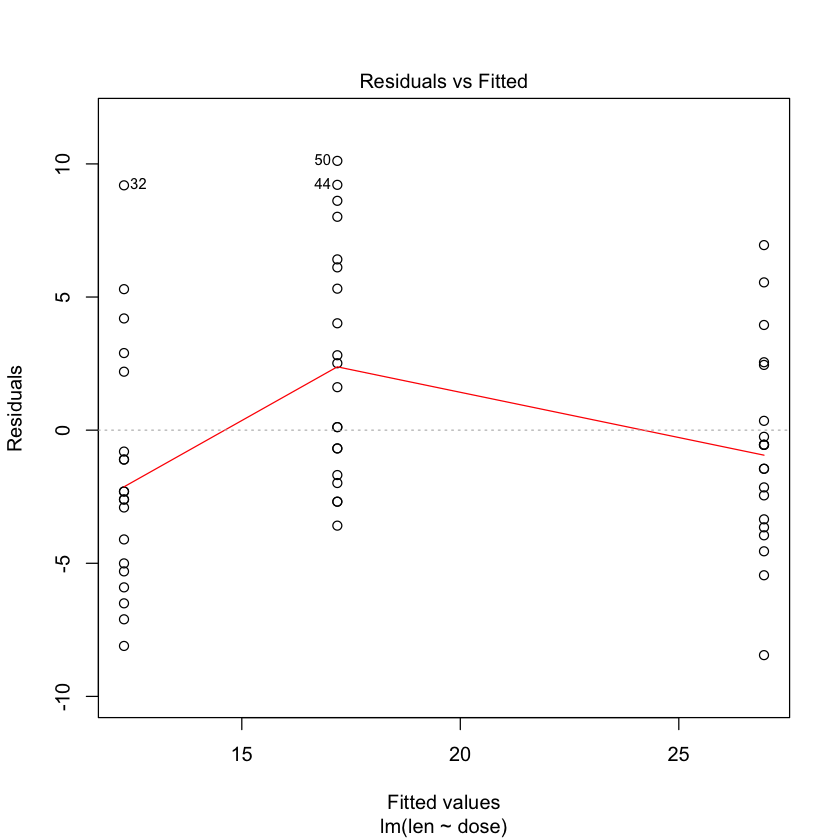

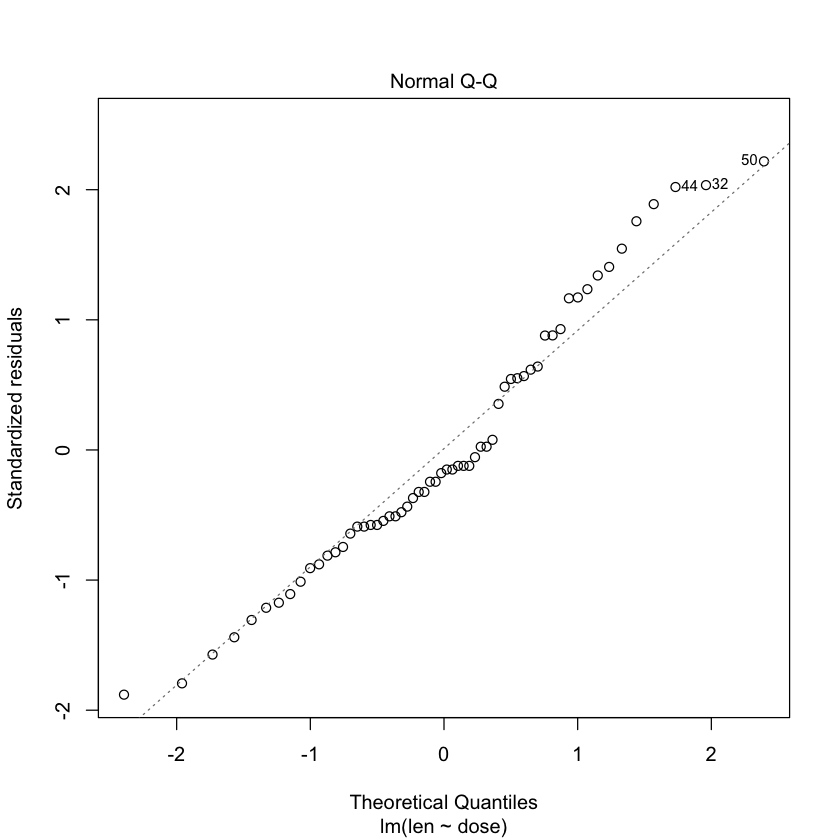

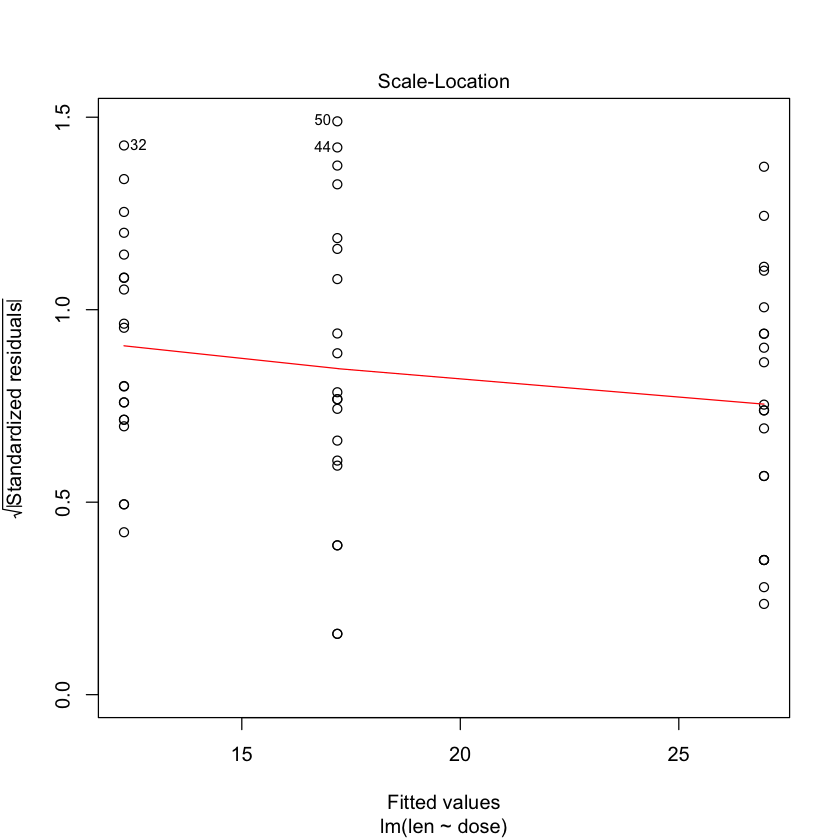

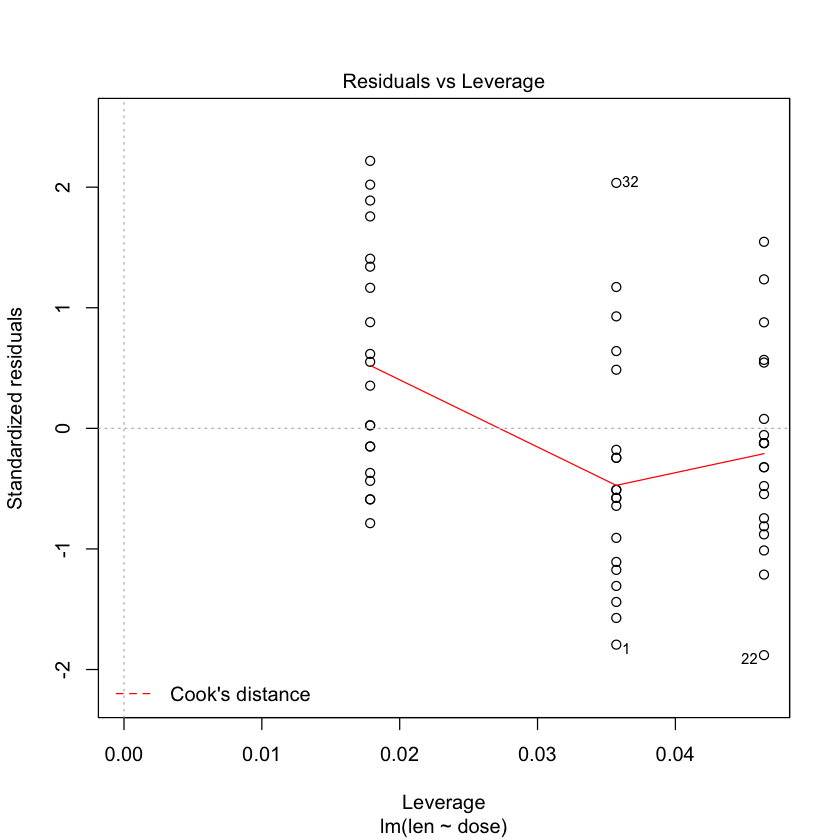

In [24]:
plot(fit.dose)

### 11.3.2 Quantitative tests (EPIB 607)
#### t test & F test

In [25]:
fit.supp <- lm(len~supp, data = tg)
summary(fit.supp)


Call:
lm(formula = len ~ supp, data = tg)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7633  -5.7633   0.4367   5.5867  16.9367 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.663      1.366  15.127   <2e-16 ***
suppVC        -3.700      1.932  -1.915   0.0604 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.482 on 58 degrees of freedom
Multiple R-squared:  0.05948,	Adjusted R-squared:  0.04327 
F-statistic: 3.668 on 1 and 58 DF,  p-value: 0.06039


In [26]:
# str(fit.supp)
# str(summary(fit.supp))

# confidence interval for the estimates
confint(fit.supp)

,2.5 %,97.5 %
(Intercept),17.928947,23.3977198
suppVC,-7.567006,0.1670064


In [27]:
t.test(len~supp, data = tg, var.equal = T)


	Two Sample t-test

data:  len by supp
t = 1.9153, df = 58, p-value = 0.06039
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1670064  7.5670064
sample estimates:
mean in group OJ mean in group VC 
        20.66333         16.96333 


#### Permutation test

,x,y
,<dbl>,<dbl>
1,-0.8372502,5.3684468
2,3.4421711,-0.8937197
3,-1.7375279,4.3233392
4,2.0515698,3.8046461
5,2.8379254,3.1308745
6,-3.2672045,2.8137802


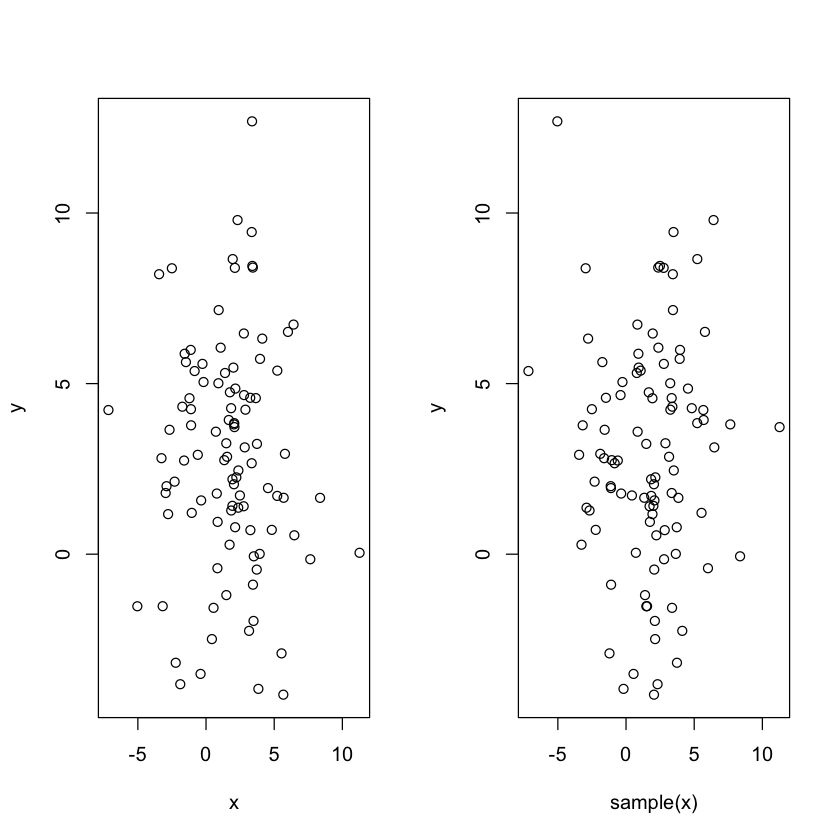

In [28]:
N <- 100
x <- rnorm(N, 1, 3)
y <- rnorm(N, 3, 3)

samp <- data.frame(x, y)
head(samp)

par(mfrow = c(1,2))
plot(x, y)

plot(sample(x), y)

,x,y
,<dbl>,<dbl>
1,-1.3636510,-6.623558
2,-0.3520202,2.162121
3,-0.2734340,-2.629488
4,-2.7185478,-8.092398
5,3.1066077,8.277938
6,0.7310363,3.972137


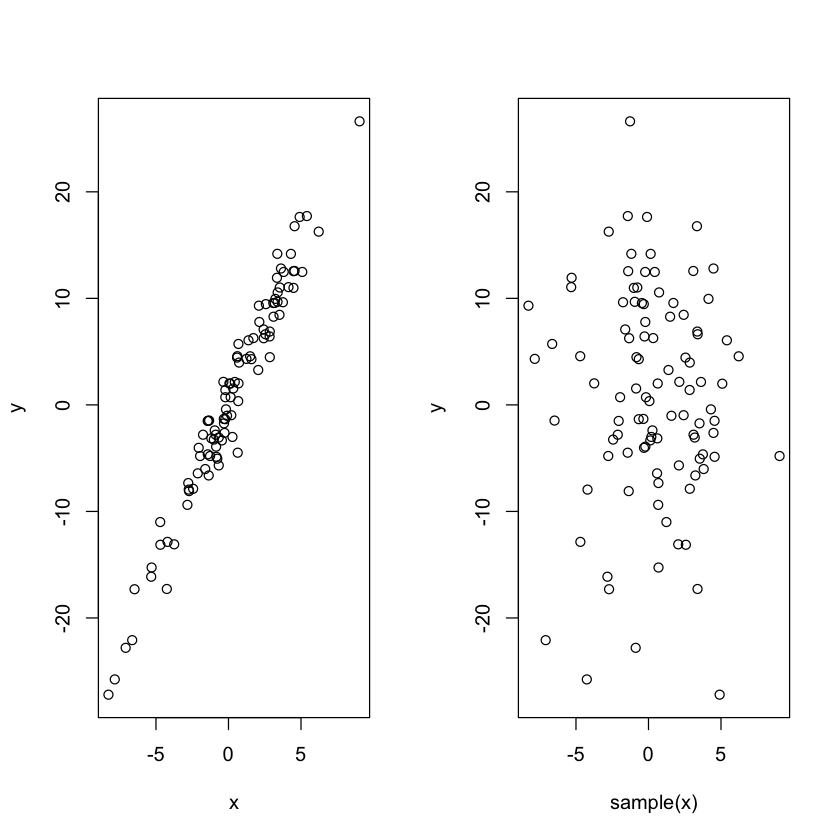

In [29]:
# Left is the case where y and x are associated
# Shuffle x breaks the association
# which leads to the plot with no pattern on the right hand side.

N <- 100
x <- rnorm(N, 1, 3)
# y <- rnorm(N, 3, 3)
y <- 3*x + rnorm(N, 0, 2)

samp <- data.frame(x, y)
head(samp)

par(mfrow = c(1,2))
plot(x, y)
plot(sample(x), y)

In [30]:
y <- tg$len
x <- tg$supp
mean(y[x=="VC"]) - mean(y[x=="OJ"])

[1] -3.7

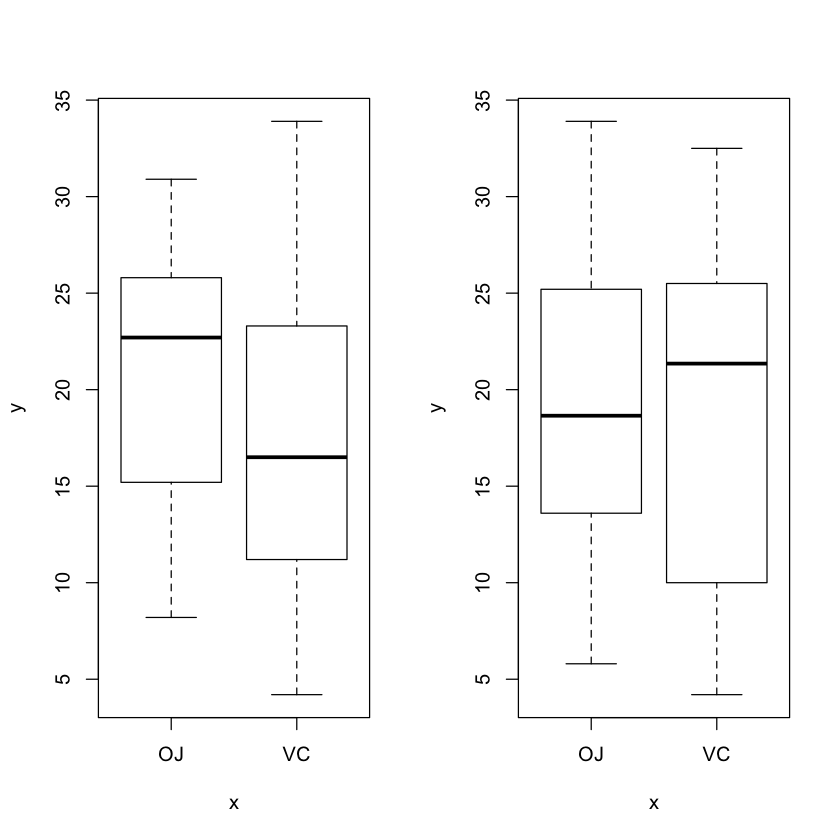

In [31]:
# right hand side is the len of the VC and OJ group after shuffling the groups
# there should be no pattern - similar to the previous plot
# no pattern means that no group is higher or lower than the other.

par(mfrow = c(1,2))
plot(x, y)
plot(sample(x), y)

In [32]:
# shuffle VC and OJ, and calculate the difference in mean between the groups

one.test <- function(x,y) {
    xstar <- sample(x)
    mean(y[xstar=="VC"]) - mean(y[xstar=="OJ"])
}

In [33]:
one.test(tg$supp, tg$len)

[1] -3.106667

[1] 0.054

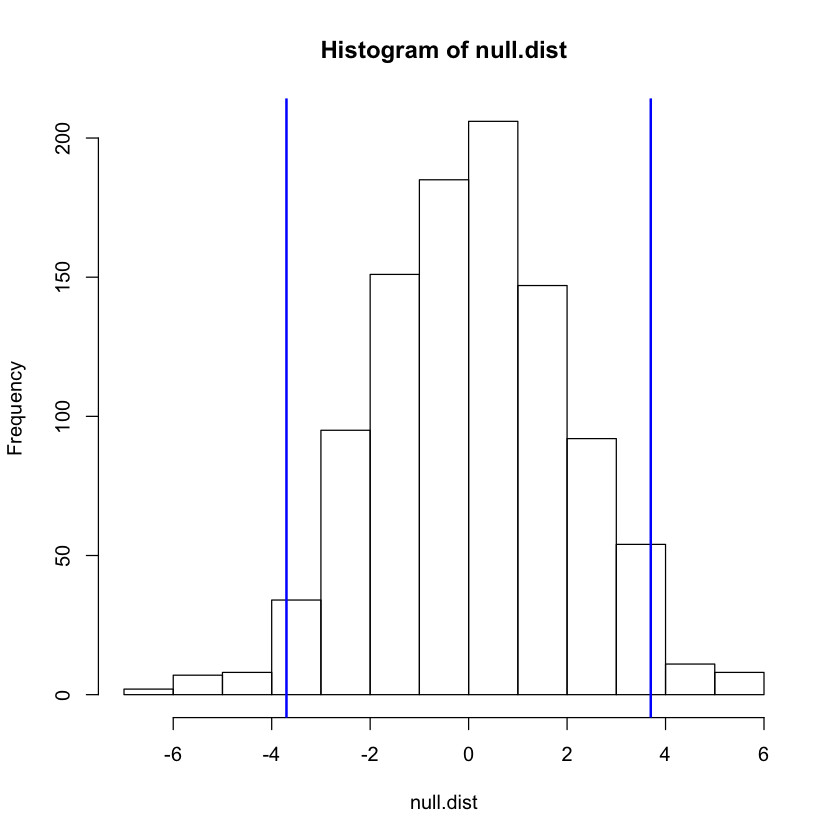

In [34]:
# The histogram is the expected distribution of the difference in mean len of the two groups
# had any potential association been removed by shuffling.

# As expected, the mean difference in mean should be close to 0 when there is no association.

null.dist <- replicate(1000, one.test(x = tg$supp, y = tg$len))
hist(null.dist)

abline(v=coef(fit.supp)["suppVC"], lwd=2, col="blue")
abline(v=-coef(fit.supp)["suppVC"], lwd=2, col="blue")

mean(abs(null.dist) > abs(coef(fit.supp)["suppVC"]))

## 11.2 Bootstrap
### 11.2.1 Motivation

### 11.2.2 Rationale